<a href="https://colab.research.google.com/github/jcl347/PyTorch-Deep-Learning-and-Artificial-Intelligence/blob/main/LP_Moores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2026-02-04 14:53:26--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2026-02-04 14:53:26 (30.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)

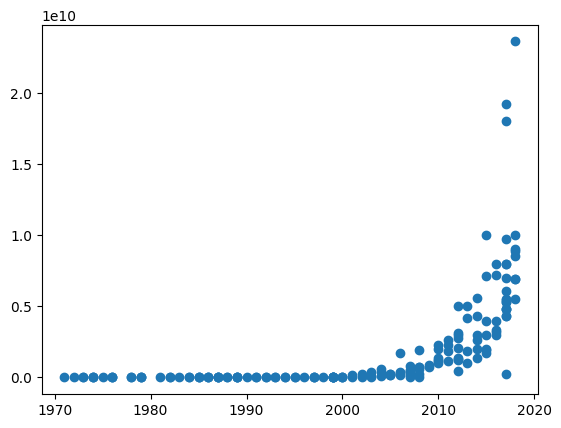

In [4]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

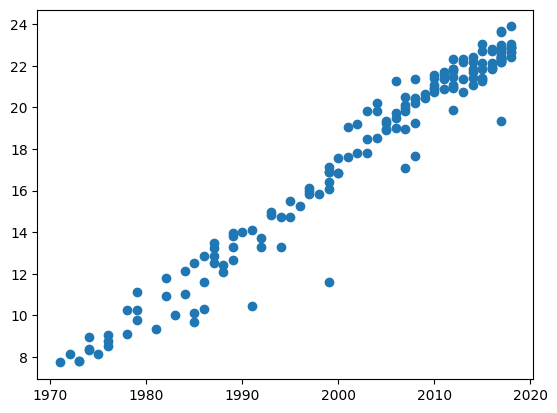

In [5]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y);
# that's better

In [6]:
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

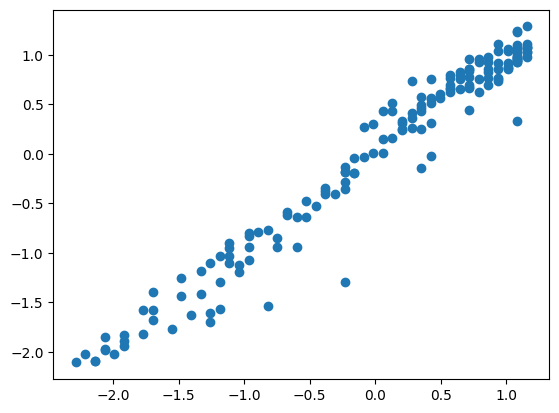

In [7]:
# Everything is centered and in a small range
plt.scatter(X, Y);

In [8]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [9]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [10]:
# Loss and optimizer
# Check out momentum
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [11]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [12]:
type(inputs)

torch.Tensor

In [13]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 4.0313
Epoch 2/100, Loss: 3.8732
Epoch 3/100, Loss: 3.6148
Epoch 4/100, Loss: 3.3011
Epoch 5/100, Loss: 2.9653
Epoch 6/100, Loss: 2.6297
Epoch 7/100, Loss: 2.3089
Epoch 8/100, Loss: 2.0113
Epoch 9/100, Loss: 1.7414
Epoch 10/100, Loss: 1.5005
Epoch 11/100, Loss: 1.2881
Epoch 12/100, Loss: 1.1027
Epoch 13/100, Loss: 0.9421
Epoch 14/100, Loss: 0.8039
Epoch 15/100, Loss: 0.6855
Epoch 16/100, Loss: 0.5845
Epoch 17/100, Loss: 0.4987
Epoch 18/100, Loss: 0.4259
Epoch 19/100, Loss: 0.3642
Epoch 20/100, Loss: 0.3122
Epoch 21/100, Loss: 0.2684
Epoch 22/100, Loss: 0.2314
Epoch 23/100, Loss: 0.2003
Epoch 24/100, Loss: 0.1742
Epoch 25/100, Loss: 0.1522
Epoch 26/100, Loss: 0.1338
Epoch 27/100, Loss: 0.1184
Epoch 28/100, Loss: 0.1054
Epoch 29/100, Loss: 0.0945
Epoch 30/100, Loss: 0.0854
Epoch 31/100, Loss: 0.0778
Epoch 32/100, Loss: 0.0714
Epoch 33/100, Loss: 0.0660
Epoch 34/100, Loss: 0.0616
Epoch 35/100, Loss: 0.0578
Epoch 36/100, Loss: 0.0546
Epoch 37/100, Loss: 0.0520
Epoch 38/1

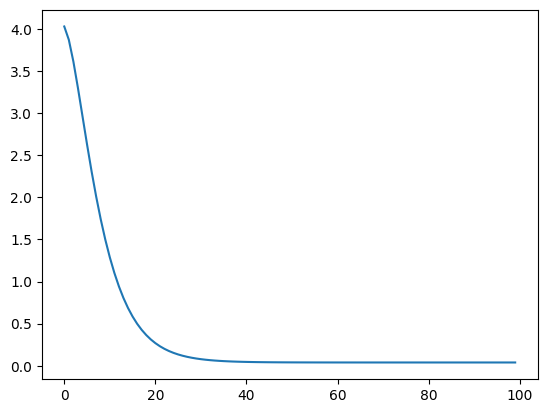

In [14]:
# Loss per iteration
plt.plot(losses);


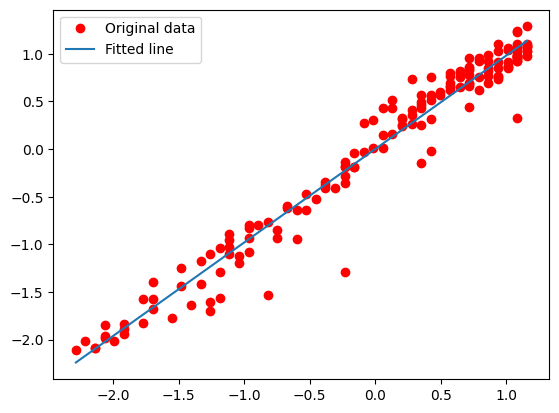

In [15]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [16]:
# What does this mean?
w = model.weight.data.numpy()
print(w)

[[0.9802087]]


## Transforming Back to the Original Scale

Our original hypothesis is that transistor growth is **exponential**, with the form:

\[
C = C_0 r^t
\]

where:
- \( C \) is the transistor count  
- \( t \) is the year  
- \( C_0 \) is the transistor count at year 0  
- \( r \) is the rate of growth  

---

## Linearization via Log Transform

We make this equation linear by taking the logarithm of both sides:

\[
\log C = \log C_0 + (\log r)\, t
\]

Here:
- \( \log C \) is the variable plotted on the **y-axis**
- \( t \) is the variable plotted on the **x-axis**

Under this model, the **log of transistor count is linear with respect to time**.

---

## Renaming Variables

We can rewrite the equation in a familiar linear form:

\[
y = a x + \log C_0
\]

where:
- \( y = \log C \)  
- \( x = t \)  
- \( a = \log r \) (the slope)  
- \( \log C_0 \) is the y-intercept  

---

## Our Model

We normalize the data as follows:

\[
y' = \frac{y - m_y}{s_y}
\]

\[
x' = \frac{x - m_x}{s_x}
\]

where:
- \( m_x \), \( m_y \) are the sample means  
- \( s_x \), \( s_y \) are the sample standard deviations  

---

## Normalized Linear Model

The normalized model is:

\[
y' = w x' + b
\]

To recover the original model, substitute the expressions for \( x' \) and \( y' \):

\[
\frac{y - m_y}{s_y} = w \frac{x - m_x}{s_x} + b
\]

---

## Recovering the Original Parameters

After algebraic manipulation:

\[
y = \frac{w s_y}{s_x} x - \frac{w s_y}{s_x} m_x + b s_y + m_y
\]

Comparing with:

\[
y = a x + \log C_0
\]

we identify:

\[
a = \frac{w s_y}{s_x}
\]

The remaining terms together form the intercept \( \log C_0 \).

---

## Key Result

Since we are only interested in the **doubling time**, we only need the slope:

\[
\boxed{a = \frac{w s_y}{s_x}}
\]

In [17]:
a = w[0,0] * sy / sx
print(a)

0.3415561983831476


## Exponential Growth Model

Our equation is currently linear, but we still need to find the **doubling time**.

---

## Original Exponential Model

The original model for exponential growth is:

\[
C = C_0 r^t
\]

where:
- \( C \) is the transistor count  
- \( t \) is the year  
- \( r \) is the rate of growth  

For example:
- When \( t \) goes from 1 to 2, \( C \) increases by a factor of \( r \)
- When \( t \) goes from 2 to 3, \( C \) increases by a factor of \( r \) again

---

## Log Transformation

Taking the logarithm of both sides:

\[
\log C = (\log r)\, t + \log C_0
\]

This gives a linear equation:

\[
y = a x + \log C_0
\]

where:
- \( y = \log C \)  
- \( x = t \)  
- \( a = \log r \)  

---

## Estimating the Growth Rate

We are interested in \( r \), the rate of growth. From our regression results, we have:

\[
a = 0.341659983
\]

Thus:

\[
r = e^{0.341659983} = 1.40728
\]

---

## Doubling Time

To find the time it takes for the transistor count to double, we determine how long it takes for:

\[
C \rightarrow 2C
\]

Let:
- \( t \) be the starting time corresponding to \( C \)
- \( t' \) be the ending time corresponding to \( 2C \)

Then:

\[
2C = C_0 r^{t'}
\]

Recall the original equation:

\[
C = C_0 r^t
\]

Dividing the two equations:

\[
\frac{2C}{C} = \frac{C_0 r^{t'}}{C_0 r^t}
\]

which simplifies to:

\[
2 = r^{(t' - t)}
\]

---

## Solving for Doubling Time

Taking the logarithm of both sides:

\[
t' - t = \frac{\log 2}{\log r}
\]

Since \( a = \log r \), we obtain:

\[
\boxed{t' - t = \frac{\log 2}{a}}
\]

---

## Important Note

The starting time \( t \) was never specified — and it does not need to be.  
This result holds for **any** starting time \( t \).

In [18]:
print("Time to double:", np.log(2) / a)


Time to double: 2.0293795979729032


## Exercise: Effect of Not Normalizing the Data

### What happens if we do not normalize the data?

If we do not normalize the data, the model can be trained **directly on the original feature scale**, which simplifies the workflow because we no longer need to perform the normalization and inverse-transformation steps.

However, this convenience comes at a cost during optimization.

---

### Impact on Optimization

When features are not normalized:

- The scale of the input values can be very large or very small
- The loss surface becomes **poorly conditioned**
- Gradient descent updates become **uneven across dimensions**

As a result:
- Optimization may converge much more slowly
- The optimizer may oscillate or diverge
- Training becomes highly sensitive to the learning rate

---

### Can we use the same learning rate?

**No — typically we cannot use the same learning rate.**

Without normalization:
- Gradients tend to be much larger in magnitude
- A learning rate that worked before is often **too large**
- This can cause unstable updates or exploding loss values

To train successfully without normalization, we usually need to:
- Use a **much smaller learning rate**
- Perform careful learning-rate tuning
- Train for more iterations

---

### Why normalization helps

Normalization:
- Brings all features to a comparable scale
- Makes the loss surface more spherical
- Allows the optimizer to use a **larger and more stable learning rate**
- Speeds up convergence

---

### Summary

- Not normalizing simplifies preprocessing but complicates optimization
- The same learning rate generally **cannot** be reused
- Normalization improves stability, speed, and reliability of training
- This is why normalization is standard practice for gradient-based models